## About


This is a markdown file for studying advanced augmentations

In [1]:
import cv2
import matplotlib.pyplot as plt

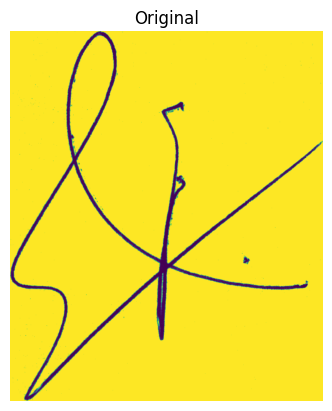

In [2]:
image = cv2.imread('/content/1.tif')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
original_image = image

plt.imshow(image)
plt.axis('off')
plt.title('Original')
plt.show()

# Advanced augmentation
* It is done to obtain real world forgery secenario from the genuine signatures.

1. Elastic transform
Elastic transformation simulates random, smooth deformations like those in real-world scanned documents or handwritten images. It distorts the image spatially using displacement fields smoothed with a Gaussian filter.

In [3]:
!pip install albumentations

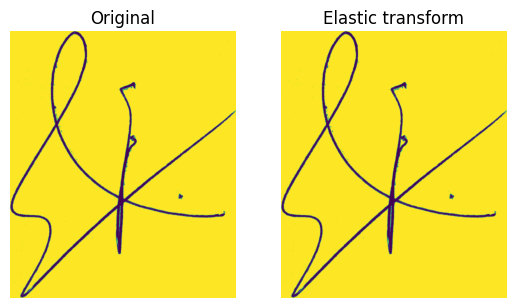

In [4]:
from albumentations import ElasticTransform
import matplotlib.pyplot as plt
import cv2

plt.subplot(1,2,1)
plt.imshow(original_image)
plt.title("Original")
plt.axis('off')

plt.subplot(1,2,2)
transform = ElasticTransform(alpha=300, sigma=5, p=0.5)
augmented = transform(image=image)['image']
plt.imshow(augmented)
plt.title("Elastic transform")
plt.axis('off')

plt.show()

2. Random Affine

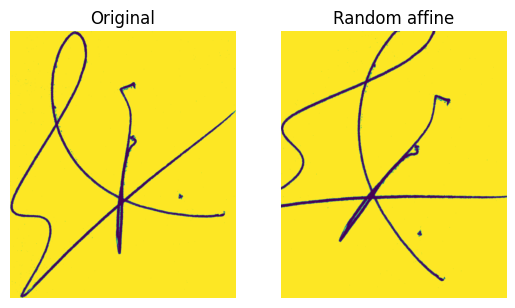

In [16]:
import torchvision.transforms as T
from PIL import Image
import numpy as np

plt.subplot(1,2,1)
plt.imshow(image)
plt.title('Original')
plt.axis('off')

plt.subplot(1,2,2)
image_pil = Image.fromarray(image)
transform = T.RandomAffine(degrees=45, scale=(0.9, 1.1), shear=10, fill=255)
augmented = transform(image_pil)
plt.imshow(augmented)
plt.title('Random affine')
plt.axis('off')
plt.show()

3. Grid distortion

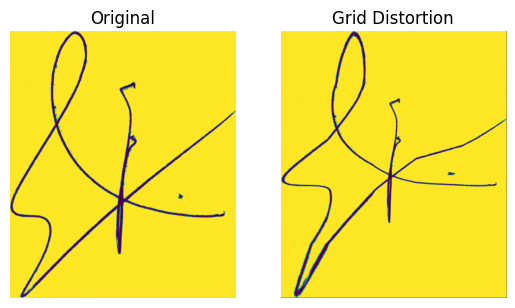

In [13]:
from albumentations import GridDistortion

plt.subplot(1,2,1)
plt.imshow(image)
plt.title('Original')
plt.axis('off')

plt.subplot(1,2,2)
transform = GridDistortion(num_steps=5, distort_limit=0.6, p=1.0)
augmented = transform(image=image)['image']
plt.imshow(augmented)
plt.title('Grid Distortion')
plt.axis('off')

plt.show()

4. Thinstroke and Thickstroke (can be used for augmentation of genuine dataset)

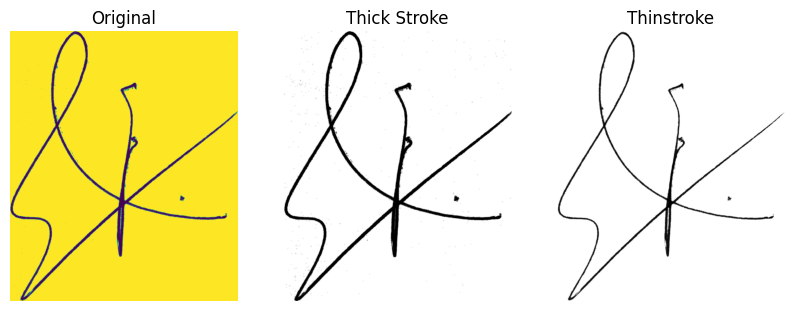

In [9]:
import cv2
import numpy as np
plt.figure(figsize=(10,10))

plt.subplot(1,3,1)
plt.imshow(image)
plt.title('Original')
plt.axis('off')

plt.subplot(1,3,2)
kernel = np.ones((2,2), np.uint8)
thin = cv2.erode(image, kernel, iterations=2)
plt.imshow(thin, cmap='gray')
plt.title('Thick Stroke')
plt.axis('off')

plt.subplot(1,3,3)
kernel = np.ones((2,2), np.uint8)
thin = cv2.dilate(image, kernel, iterations=2)
plt.imshow(thin, cmap='gray')
plt.axis('off')
plt.title('Thinstroke')

plt.show()